In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

## Basic tools needed in Prediction ##

To learn how to examine the association between quantitative variables, we consider a climate dataset related to the Adirondack mountains. We can read more about these mountains [here](https://en.wikipedia.org/wiki/Adirondack_Mountains). 

The Adirondack Mountains are a massif of mountains in Northeastern New York which form a circular dome approximately 160 miles (260 km) wide and covering about 5,000 square miles.  The region contains more than 100 peaks, including Mount Marcy, which is the highest point in New York at 5,344 feet (1,629 m).

**The Adirondack High Peaks, a traditional list of 46 peaks over 4,000 feet (1,200 m), are popular hiking destinations.** There are over 200 named lakes, with the number of smaller lakes, ponds, and other bodies of water reaching over 3,000. Among the named lakes around the mountains are Lake George, Lake Placid, and Lake Tear of the Clouds. The region has over 1,200 miles (1,900 km) of river

In [3]:
HighPeaks = Table.read_table('HighPeaks.csv')
HighPeaks

Peak,Elevation,Difficulty,Ascent,Length,Time
Mt. Marcy,5344,5,3166,14.8,10
Algonquin Peak,5114,5,2936,9.6,9
Mt. Haystack,4960,7,3570,17.8,12
Mt. Skylight,4926,7,4265,17.9,15
Whiteface Mtn.,4867,4,2535,10.4,8.5
Dix Mtn.,4857,5,2800,13.2,10
Gray Peak,4840,7,4178,16,14
Iroquois Peak,4840,6,3250,11.6,8.5
Basin Mtn.,4827,6,3650,16.5,11
Gothics,4736,5,4070,10,9


The data above contains data on measured variables like:

- What is the name of the mountain?: Peak
- What is the size of the mountain?: Elevation
- A rating of how diffcult it was to climb the mountain: Difficulty
- The vertical distance you climb to the top of the mountain, measured from the point of the elevation to the peak of the mountain: Ascent
- The trip to the peak of the mountain and back(measured in miles): Length
- How long, in hours, does it take to climb to the peak of the mountain: Time

Here is a research question that might be of interest: What are key factors that determine how long it takes to climb a mountain? We can do some data exploration below.

What are key predictors of the variability in the `Time` spent climbing a mountain? Is `Ascent` an informative predictor of `Time`? 

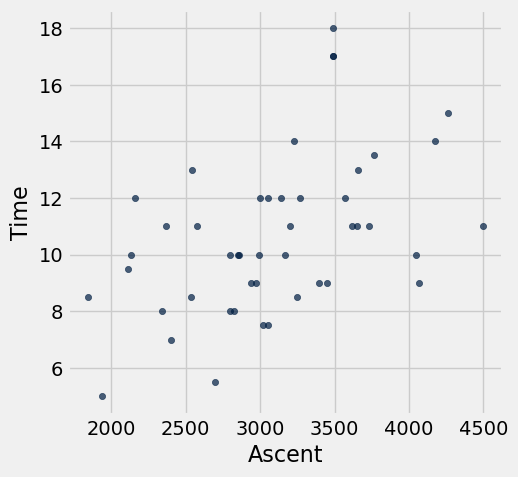

In [27]:
# For two quantitative/numerical variables, use a scatterplot to visualize if any relationship exist at all.

HighPeaks.scatter('Ascent', 'Time')

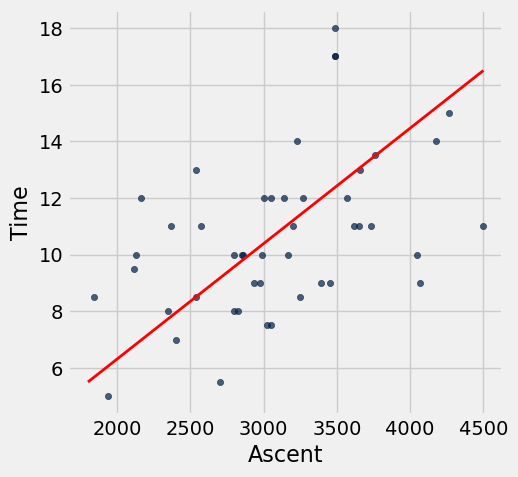

In [28]:
HighPeaks.scatter('Ascent', 'Time')

# My guess about a line that may describe the trend

plots.plot([1800,4500], [5.5,16.5], color='red', lw=2);

## Association ##

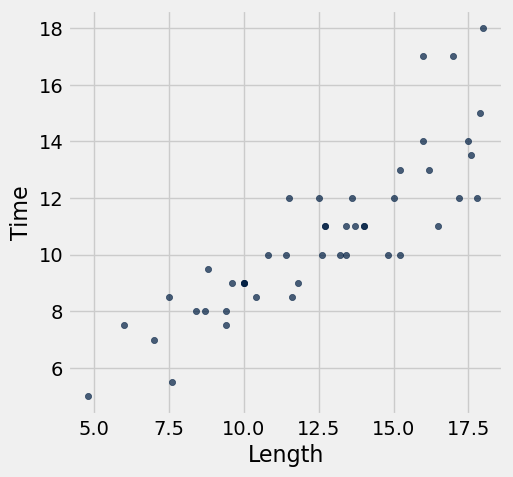

In [29]:
HighPeaks.scatter('Length', 'Time')

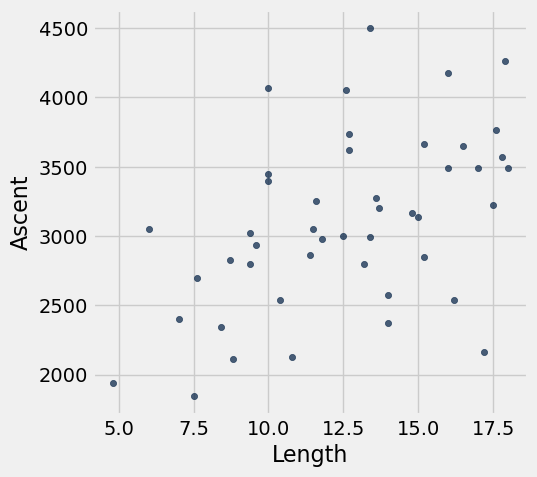

In [30]:
HighPeaks.scatter('Length', 'Ascent')

This is again a good moment to review the utility of the standardized version of data collections. 

We recall the formula for deriving data values in standard units.

$$
z=\frac{X-\mu}{\sigma}
$$

Where:

- X is the raw, observed value in the data set that you want to standardize.
- $\mu$, the mean is the average (arithmetic mean) of the dataset.
- $\sigma$, the standard deviation of the dataset.

We define a utility function for finding the standardized value of each value in a collection of data values.

In [31]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

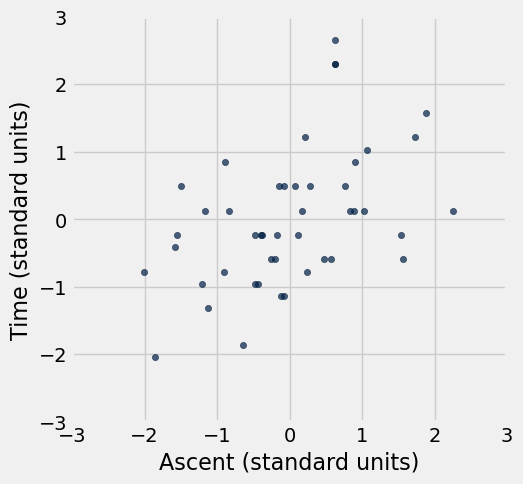

In [32]:
Table().with_columns(
    'Ascent (standard units)',  standard_units(HighPeaks.column('Ascent')), 
    'Time (standard units)', standard_units(HighPeaks.column('Time'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

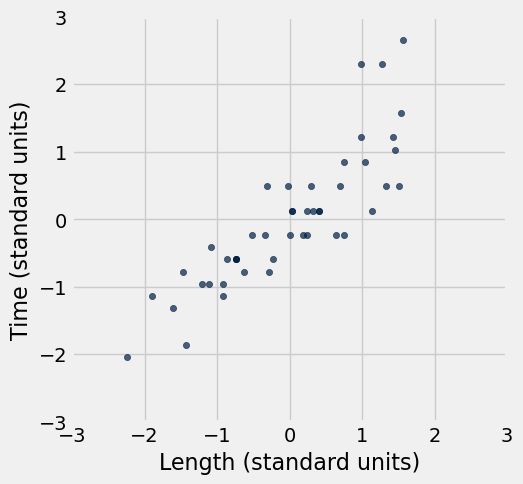

In [33]:
Table().with_columns(
    'Length (standard units)',  standard_units(HighPeaks.column('Length')), 
    'Time (standard units)', standard_units(HighPeaks.column('Time'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

## Correlation ##

In data science, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. 

Although in the broadest sense, "correlation" may indicate any type of association, in data science it usually refers to the degree to which a pair of variables are linearly related. 

Familiar examples of dependent phenomena include the correlation between the height of parents and their offspring, and the correlation between the price of a good and the quantity the consumers are willing to purchase.

Note: [Correlation does not always imply causation](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation). However, causation does not always imply correlation.

We measure the strength of the linear relationship between two numerical variables using the `Pearson Product Moment Correlation Coeffcient`, _r_. 

- If the relationship is strong and positive, the correlation will be near +1.
- If it is strong and negative, it will be near -1. 
- If there is no apparent linear relationship between the variables, then the correlation will be near zero.
- The units of measurement of either the explanatory variable or the response variable does not change the value of the correlation coefficient.

Let us consider some visualizations of the shape of a graph for varying values of _r_.

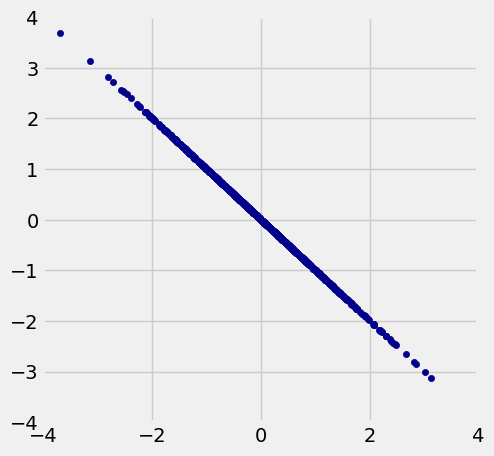

In [48]:
# Use the utility fucntion defined above to draw visualizations.

r_scatter(-1)

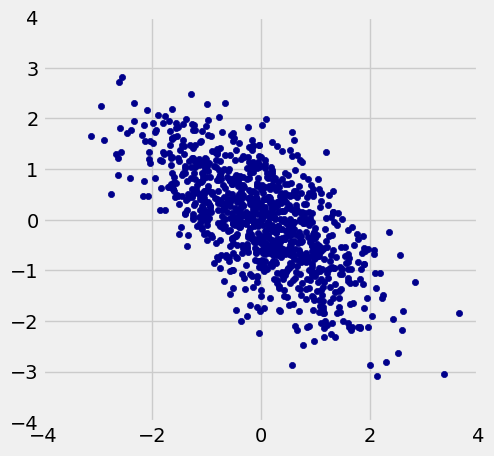

In [49]:
r_scatter(-0.66)

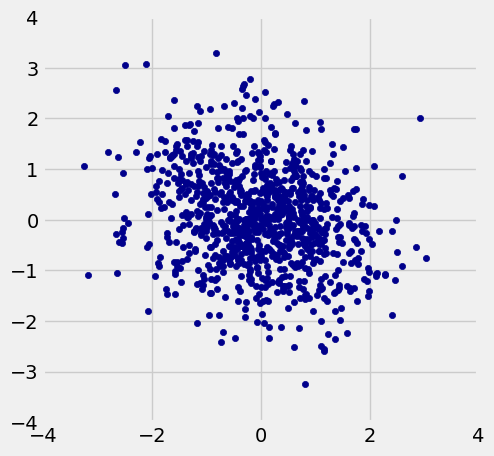

In [39]:
r_scatter(-0.23)

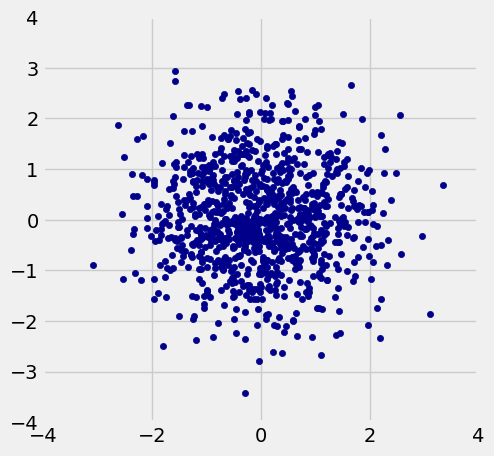

In [40]:
r_scatter(0)

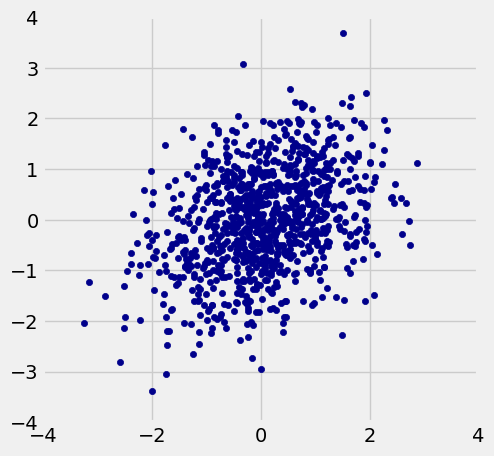

In [41]:
r_scatter(0.33)

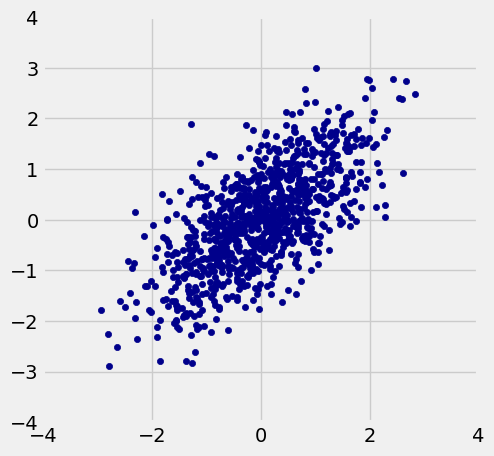

In [42]:
r_scatter(0.66)

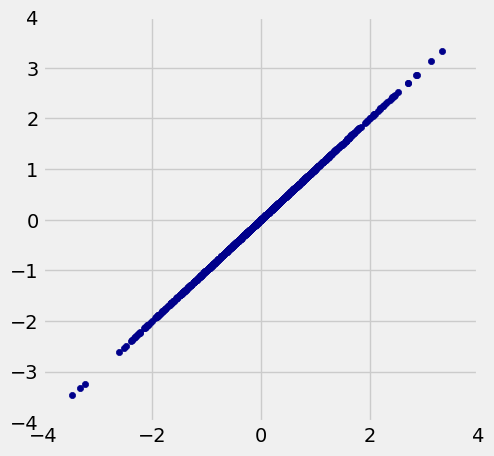

In [43]:
r_scatter(1)

## Calculating $r$ ##

To calculate the value of r, 

- Step 1: Convert the x-values to standard units and set aside in a new column.
- Step 2: Convert the y-values to standard units and set aside in a new column.
- Step 3: Multiply standard units in steps 1 and 2 above to get the products.
- Step 4: Find the average of all products obtained in step 3.

In [50]:
HighPeaks_AT = HighPeaks.select('Ascent', 'Time')
HighPeaks_AT

Ascent,Time
3166,10
2936,9
3570,12
4265,15
2535,8.5
2800,10
4178,14
3250,8.5
3650,11
4070,9


Is `Ascent` an informative predictor of `Time`? 

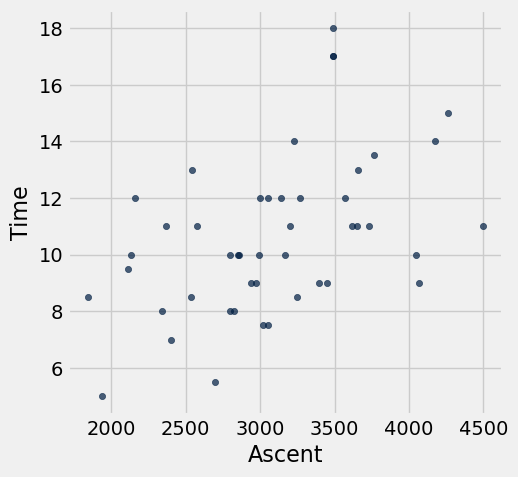

In [51]:
# Always start with visualization of the relationship(if one exists!)

HighPeaks_AT.scatter('Ascent')

In [52]:
# Steps 1 and 2 above.

HighPeaks_AT = HighPeaks_AT.with_columns(
    'Ascent (standard units)',  standard_units(HighPeaks.column('Ascent')), 
    'Time (standard units)', standard_units(HighPeaks.column('Time'))
)

HighPeaks_AT

Ascent,Time,Ascent (standard units),Time (standard units)
3166,10,0.111747,-0.23595
2936,9,-0.257486,-0.59774
3570,12,0.760312,0.48763
4265,15,1.87604,1.573
2535,8.5,-0.901235,-0.778635
2800,10,-0.475814,-0.23595
4178,14,1.73637,1.21121
3250,8.5,0.246597,-0.778635
3650,11,0.888741,0.12584
4070,9,1.56299,-0.59774


In [53]:
# Step 3: Multiply standard units in steps 1 and 2 above to get the products.

HighPeaks_AT = HighPeaks_AT.with_columns(
    'product of standard units', HighPeaks_AT.column(2) * HighPeaks_AT.column(3))
HighPeaks_AT

Ascent,Time,Ascent (standard units),Time (standard units),product of standard units
3166,10,0.111747,-0.23595,-0.0263667
2936,9,-0.257486,-0.59774,0.153909
3570,12,0.760312,0.48763,0.370751
4265,15,1.87604,1.573,2.95101
2535,8.5,-0.901235,-0.778635,0.701733
2800,10,-0.475814,-0.23595,0.112268
4178,14,1.73637,1.21121,2.10311
3250,8.5,0.246597,-0.778635,-0.192009
3650,11,0.888741,0.12584,0.111839
4070,9,1.56299,-0.59774,-0.934262


In [55]:
# Step 4: Find the average of all products obtained in step 3.
# r is the average of the products of the standard units

r = np.average(HighPeaks_AT.column('product of standard units'))
r

0.46887529021391772

## Function for Calculating $r$ ##

Instead of following all the steps above, let us define a user-defined function that combines all four steps.

In [56]:
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

In [58]:
# Define which variable takes the roles of x and y.

correlation(HighPeaks, 'Ascent', 'Time')

0.46887529021391772

In [59]:
correlation(HighPeaks, 'Length', 'Time')

0.85850786456945893

In [60]:
correlation(HighPeaks, 'Length', 'Ascent')

0.48496918358745444

### Switching Axes ###

Does switching the variables affect the value of the correlation coefficient?

In [61]:
correlation(HighPeaks, 'Ascent', 'Time'), correlation(HighPeaks, 'Time', 'Ascent')

(0.46887529021391772, 0.46887529021391772)

### Nonlinearity ###

The correlation coefficient is ONLY useful for measuring the strength of `linear` relationship between two numerical variables.

Not all relationships are linear in nature. Some other forms of relationships that might be observed are no association/relationship, quadratic relationship, cubic, logistic, logarithmic, etc...

In [62]:
Tortoises = Table.read_table('Tortoises.csv')
Tortoises

CarapaceLength,NumEggs
284,3
290,2
290,7
290,7
298,11
299,12
302,10
306,8
306,8
309,9


In [63]:
correlation(Tortoises, 'CarapaceLength', 'NumEggs')

0.12157054742545714

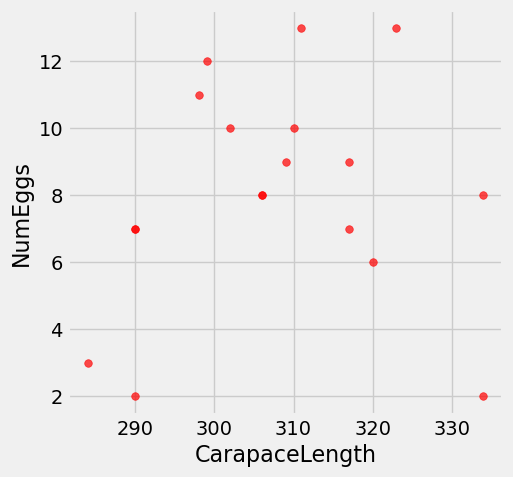

In [64]:
Tortoises.scatter('CarapaceLength', 'NumEggs', s=30, color='r')

### The effect of outliers on the value of  ###

Goal: Let us consider an example to show that `the value of the correlation coefficient is affected by outliers`.

In [71]:
PalmBeach = Table.read_table('PalmBeach.csv')
PalmBeach

County,Buchanan,Bush
ALACHUA,262,34062
BAKER,73,5610
BAY,248,38637
BRADFORD,65,5413
BREVARD,570,115185
BROWARD,789,177279
CALHOUN,90,2873
CHARLOTTE,182,35419
CITRUS,270,29744
CLAY,186,41745


In [72]:
correlation(PalmBeach, 'Buchanan', 'Bush')

0.62363943782225617

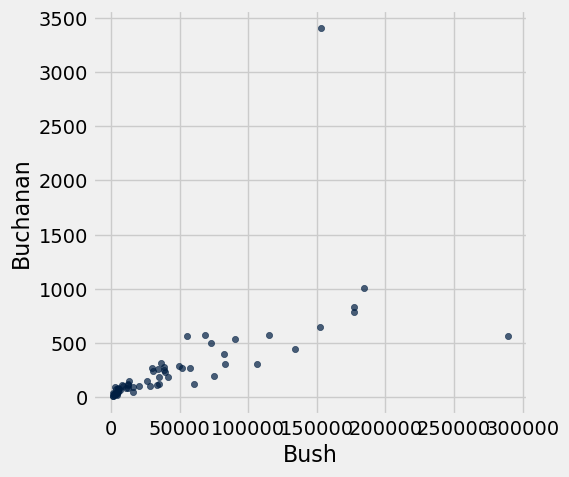

In [73]:
PalmBeach.scatter('Bush', 'Buchanan')

In [74]:
PalmBeach_removed = PalmBeach.where('County', are.not_containing('PALM BEACH'))

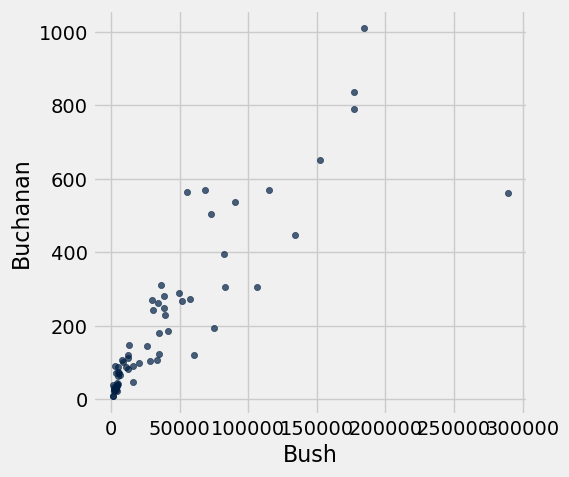

In [75]:
PalmBeach_removed.scatter('Bush', 'Buchanan')

In [77]:
correlation(PalmBeach_removed, 'Buchanan', 'Bush')

0.86705354875363239